Starter file for Project 1 - need to load in Spotify CSV!


In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
csv_path = Path("Resources/spotify-2023.csv")

spotify_df = pd.read_csv(csv_path, encoding='iso-8859-1')

#Basic Dataframe with all information
spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,artist_count,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# David!

In [4]:
#bucket to store the artists names as a list
artist_list = []

#columns into lists and drop the NA values
artist1_list = spotify_df["Artist Name 1"].dropna().tolist()
artist2_list = spotify_df["Artist Name 2"].dropna().tolist()
artist3_list = spotify_df["Artist Name 3"].dropna().tolist()
artist4_list = spotify_df["Artist Name 4"].dropna().tolist()
artist5_list = spotify_df["Artist Name 5"].dropna().tolist()
artist6_list = spotify_df["Artist Name 6"].dropna().tolist()
artist7_list = spotify_df["Artist Name 7"].dropna().tolist()
artist8_list = spotify_df["Artist Name 8"].dropna().tolist()

#compile the lists
artist_list.extend(artist1_list)
artist_list.extend(artist2_list)
artist_list.extend(artist3_list)
artist_list.extend(artist4_list)
artist_list.extend(artist5_list)
artist_list.extend(artist6_list)
artist_list.extend(artist7_list)
artist_list.extend(artist8_list)

artist_list

['Latto',
 'Myke Towers',
 'Olivia Rodrigo',
 'Taylor Swift',
 'Bad Bunny',
 'Dave',
 'Eslabon Armado',
 'Quevedo',
 'Gunna',
 'Peso Pluma',
 'Bad Bunny',
 'NewJeans',
 'Miley Cyrus',
 'David Kushner',
 'Harry Styles',
 'SZA',
 'Fifty Fifty',
 'Billie Eilish',
 'Feid',
 'Jimin',
 'Gabito Ballesteros',
 'Taylor Swift',
 'Arctic Monkeys',
 'Bizarrap',
 'The Weeknd',
 'Fuerza Regida',
 'Rema',
 'Tainy',
 'Morgan Wallen',
 'Dua Lipa',
 'Troye Sivan',
 'Peso Pluma',
 'The Weeknd',
 'Taylor Swift',
 'Karol G',
 'Big One',
 'Yahritza Y Su Esencia',
 'Taylor Swift',
 'Taylor Swift',
 'Fuerza Regida',
 'Junior H',
 'Post Malone',
 'Bebe Rexha',
 'Tyler',
 'Nicki Minaj',
 'Miley Cyrus',
 'OneRepublic',
 'The Weeknd',
 'The Weeknd',
 'Ariana Grande',
 'Feid',
 'David Guetta',
 'Karol G',
 'Peggy Gou',
 'Tom Odell',
 'The Weeknd',
 'Kali Uchis',
 'Manuel Turizo',
 'Karol G',
 'Taylor Swift',
 'dennis',
 'PinkPantheress',
 'Charlie Puth',
 'Rauw Alejandro',
 'Ozuna',
 'Chris Molitor',
 'Taylor Swif

In [5]:
# Number of artists in the sample
print(len(artist_list))

1482


In [6]:
# Number of songs in the sample
counter = 0
for row in spotify_df["track_name"]:
   counter = counter + 1
counter   

952

In [7]:
# DF of the full artist list
all_artists_df = pd.DataFrame(artist_list)

# Clean up data / DF
all_artists_df.columns = ["Artist"]
all_artists_df["Artist"].replace({" Bad Bunny": "Bad Bunny"}, inplace=True)

all_artists_df.head(10)

,Artist
0,Latto
1,Myke Towers
2,Olivia Rodrigo
3,Taylor Swift
4,Bad Bunny
5,Dave
6,Eslabon Armado
7,Quevedo
8,Gunna
9,Peso Pluma


In [8]:
# Unique artists in the sample
print(len(all_artists_df.value_counts()))

802


In [9]:
# Sorted by most common and update DF
sorted_df = all_artists_df.value_counts().sort_values(ascending=False)
count_sorted_df = pd.DataFrame(sorted_df)

count_sorted_df.head(10)

,count
Artist,
Bad Bunny,41
Taylor Swift,36
The Weeknd,34
SZA,23
Kendrick Lamar,23
Drake,19
Harry Styles,17
Feid,15
Ed Sheeran,13


In [10]:
#limit the list to only the top 5
topfive_df = count_sorted_df.loc[(count_sorted_df["count"] >= 20)]

#add back the index
topfive_df.reset_index(inplace=True)

topfive_df

,Artist,count
0,Bad Bunny,41
1,Taylor Swift,36
2,The Weeknd,34
3,SZA,23
4,Kendrick Lamar,23


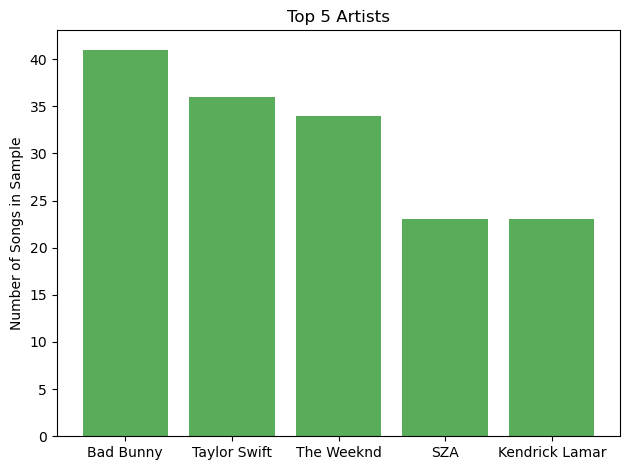

In [11]:
# bar chart 
x_axis = np.arange(len(topfive_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, topfive_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, topfive_df["Artist"], rotation="horizontal")

plt.title("Top 5 Artists")
plt.ylabel("Number of Songs in Sample")
plt.tight_layout()

plt.show()

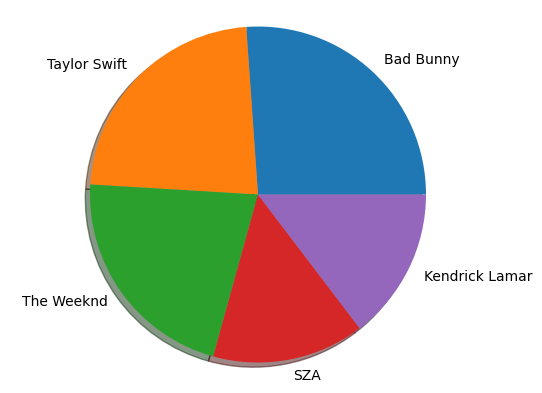

In [12]:
# pie chart - not really helpful

sizes = topfive_df["count"]
labels = topfive_df["Artist"]

plt.pie(sizes, explode=None, labels=labels, colors=None, shadow=True)
plt.axis("equal")
plt.show()


In [13]:
spotify_df.columns


Index(['track_name', 'Artist Name 1', 'Artist Name 2', 'Artist Name 3',
       'Artist Name 4', 'Artist Name 5', 'Artist Name 6', 'Artist Name 7',
       'Artist Name 8', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [14]:
short_spotify_df = spotify_df[["track_name","Artist Name 1","Artist Name 2","Artist Name 3",
                              "Artist Name 4","Artist Name 5","Artist Name 6","Artist Name 7"
                              ,"Artist Name 8", "released_year", "streams"]].copy()
short_spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2023,141381703
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,133716286
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,140003974
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,800840817
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,303236322


In [33]:
sorted_short_df = short_spotify_df.sort_values("streams", ascending=False)
sorted_short_df

#DF for streams over 1 billion, and over 2 billion
# one_bill_df = short_spotify_df[(short_spotify_df["streams"] >= 1000000000)]
# two_bill_df = short_spotify_df[(short_spotify_df["streams"] >= 2000000000)]
# one_bill_df.count()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
55,Blinding Lights,The Weeknd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3703895074
179,Shape of You,Ed Sheeran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,3562543890
86,Someone You Loved,Lewis Capaldi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2887241814
619,Dance Monkey,Tones and I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Swae Lee,NaN,NaN,NaN,NaN,NaN,NaN,2018,2808096550
...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,14780425
142,"Gol Bolinha, Gol Quadrado 2",Mc Pedrinho,DJ 900,NaN,NaN,NaN,NaN,NaN,NaN,2023,11956641
144,QUEMA,Sog,Ryan Castro,Peso Pluma,NaN,NaN,NaN,NaN,NaN,2023,11599388
393,Jhoome Jo Pathaan,Arijit Singh,Vishal Dadlani,Sukriti Kakar,Vishal-Shekhar,Shekhar Ravjiani,Kumaar,NaN,NaN,2022,1365184


In [ ]:
#Austin!

In [ ]:
#Dan